# Demo cas test avec maquette

Ceci est un notebook pour des expériences numériques en différents cas faites avec la maquette.

Cas infiltration, conduction : dH > 0, K petit

Cas infiltration, advection : dH > 0, K grand

Cas exfiltration, conduction : dH < 0, K petit

Cas exfiltration, advection : dH < 0, K grand

In [1]:
from pyheatmy import *
import matplotlib.pyplot as plt
import numpy as np

## Variables globales de l'expérience

In [2]:
K_offset = 273.15

t_debut = (2010, 1, 1)
t_fin = (2010, 5, 30, 23, 59, 59)
dt = 15*60 # pas de temps en (s)

T_riv_amp = 1
T_riv_offset = 20 + K_offset
P_T_riv = 5*24*4*dt

T_aq_amp = 0
T_aq_offset = 12 + K_offset
P_T_aq = -9999 # à mettre dans le init

dH_amp = 0
dH_offset = 1
P_dh = -9999 #14*24*4*dt

nb_cells =100

## Fonction de définition de l'expérience

In [3]:
def gen_experiment_monolayer(depth_sensors, name, moinslog10K, n, lambda_s, rho_cs, nb_cells=nb_cells, perturb="False"):
    """Génération de l'expérience pour une seule couche"""
    # définition de l'expérience 
    """Times series"""
    time_series_dict = {
        "offset" : 0,
        "depth_sensors":depth_sensors,
        "param_time_dates": [t_debut, t_fin, dt], 
        "param_dH_signal": [dH_amp, P_dh, dH_offset],
        "param_T_riv_signal": [T_riv_amp, P_T_riv, T_riv_offset],
        "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
        "sigma_meas_P": 0.05,
        "sigma_meas_T": 0.1, #float
    }
    # on génère l'objet Times_series
    time_series = Time_series.from_dict(time_series_dict)
    # on génère les données
    if perturb == True :
        time_series._generate_perturb_T_riv_dH_series()
        time_series._generate_perturb_T_Shaft_Temp_series()
    else :
        time_series._generate_T_riv_dH_series()
        time_series._generate_Shaft_Temp_series()

    """Colonne"""
    col_dict = {
        "river_bed": 1., 
        "depth_sensors": depth_sensors,
        "offset": .0,
        "dH_measures": time_series._T_riv_dH_measures,
        "T_measures": time_series._T_Shaft_measures,
        "sigma_meas_P": time_series._sigma_P, #float
        "sigma_meas_T": time_series._sigma_T, #float
    }
    # on génère l'objet Column à partir de l'objet Time_series
    colonne_exp = Column.from_dict(col_dict)

    """Layer"""
    monolayer_dict = {
        "name": name,
        "zLow": depth_sensors[-1],
        "moinslog10K": moinslog10K,
        "n": n,
        "lambda_s": lambda_s,
        "rhos_cs": rho_cs
    }
    # on génère l'objet Layer
    monolayer = Layer.from_dict(monolayer_dict)

    """Valeurs analytiques"""
    analy_sol_dict = {
        "column_exp" : colonne_exp,
        "time_series" : time_series,
        "monolayer" : monolayer,
        "nb_cells" : nb_cells,
    }

    # on génère l'objet des solution analytique
    analy_sol_exp = Analy_Sol.from_dict(analy_sol_dict)
    return time_series, colonne_exp, monolayer, analy_sol_exp

In [4]:
def gen_experiment_multilayer(depth_sensors, name_list, zLow_list, moinslog10K_list, n_list, lambda_s_list, rho_cs_list, nb_cells, perturb="False"):
    """Génération de l'expérience pour plusieurs couches et on ne génère pas de réponse analytique"""
    # définition de l'expérience 
    """Times series"""
    time_series_dict = {
        "offset" : 0,
        "depth_sensors":depth_sensors,
        "param_time_dates": [t_debut, t_fin, dt], 
        "param_dH_signal": [dH_amp, P_dh, dH_offset],
        "param_T_riv_signal": [T_riv_amp, P_T_riv, T_riv_offset],
        "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
        "sigma_meas_P": 0.05,
        "sigma_meas_T": 0.1, #float
    }
    # on génère l'objet Times_series
    time_series = Time_series.from_dict(time_series_dict)
    # on génère les données
    if perturb == True :
        time_series._generate_perturb_T_riv_dH_series()
        time_series._generate_perturb_T_Shaft_Temp_series()
    else :
        time_series._generate_T_riv_dH_series()
        time_series._generate_Shaft_Temp_series()

    """Colonne"""
    col_dict = {
        "river_bed": 1., 
        "depth_sensors": depth_sensors,
        "offset": .0,
        "dH_measures": time_series._T_riv_dH_measures,
        "T_measures": time_series._T_Shaft_measures,
        "sigma_meas_P": time_series._sigma_P, #float
        "sigma_meas_T": time_series._sigma_T, #float
    }
    # on génère l'objet Column à partir de l'objet Time_series
    colonne_exp = Column.from_dict(col_dict)

    """Layer"""
    layers_list= layersListCreator([(name_list[i], zLow_list[i], moinslog10K_list[i], n_list[i], lambda_s_list[i], rho_cs_list[i]) for i in range(len(name_list))])

    return time_series, colonne_exp, layers_list


## 1. Cas test monolayer (Billes en verre, Sable)


In [5]:
# paramètres principaux de l'expérience
dict_exp_monolayer ={
    "depth_sensors": [.25, .5, .75, 1],
    "name" : "sable",
    "moinslog10K": 4,
    "n": 0.1,
    "lambda_s": 2,
    "rho_cs": 4e6,
    "nb_cells": nb_cells,
}
# maj variables globales

experiment_monolayer = [*gen_experiment_monolayer(**dict_exp_monolayer)] # [time_series, colonne_exp, monolayer, analy_sol_exp]

In [6]:
# paramètres principaux de l'expérience
dict_exp_multilayer ={
    "depth_sensors": [.25, .5, .75, 1],
    "name_list": ["sable","argile"],
    "zLow_list": [.4,1],
    "moinslog10K_list": [6,12],
    "n_list": [.1,.1],
    "lambda_s_list": [2,2.5],
    "rho_cs_list": [4e6,4e6],
    "nb_cells": nb_cells,
}
# maj variables globales

experiment_multilayer = [*gen_experiment_multilayer(**dict_exp_multilayer)] # [time_series, colonne_exp, layerlist]

In [7]:
time_ser = experiment_multilayer[0]
col = experiment_multilayer[1]
layerlist = experiment_multilayer[2]

dz = col._real_z[-1] / nb_cells

time_ser._measures_column_one_layer(col, layerlist, nb_cells)
time_ser._generate_perturb_T_riv_dH_series()
time_ser._generate_perturb_Shaft_Temp_series()
nt = 3000 #durée max d'observation

# les sorties des différents capteurs après passage dans le modèle direct
t_range = time_ser._time_array
n_sens = len(time_ser._depth_sensors)-1

--- Compute Solve Transi ---
sable : ends at 0.4 m. Parametres(moinslog10K=6, n=0.1, lambda_s=2, rhos_cs=4000000.0)
argile : ends at 1 m. Parametres(moinslog10K=12, n=0.1, lambda_s=2.5, rhos_cs=4000000.0)
Done.


In [8]:
col._T_measures

array([[291.19000244, 289.19000244, 287.19000244],
       [291.1975708 , 289.19015503, 287.19015503],
       [291.20513916, 289.19036865, 287.19033813],
       ...,
       [291.53466797, 289.65704346, 287.49719238],
       [291.53820801, 289.65612793, 287.49612427],
       [291.54187012, 289.65527344, 287.49508667]])

Text(0.5, 1.0, "Frise Flux d'eau MD")

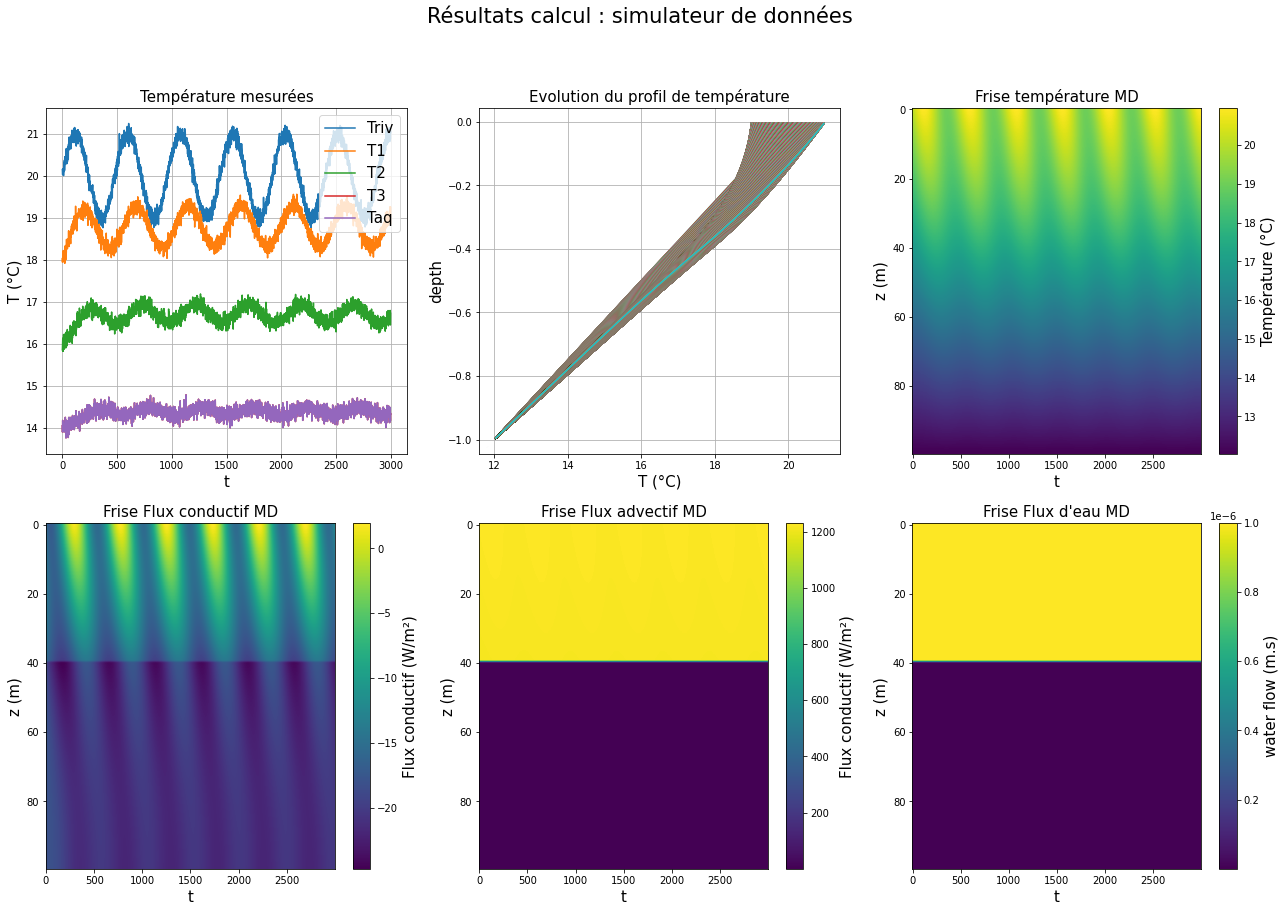

In [9]:
"""Plots des profils de température"""
fontsize = 15
fig, ax = plt.subplots(2,3, sharey=False, figsize = (22, 14))
fig.suptitle("Résultats calcul : simulateur de données",fontsize = fontsize+6)
ax[0,0].plot(time_ser._T_riv_perturb[:nt]-K_offset, label="Triv")
for i in range(n_sens):
    ax[0,0].plot(time_ser._T_Shaft_perturb[:nt,i]-K_offset, label="T{}".format(i+1))
ax[0,0].plot(time_ser._T_Shaft_perturb[:nt,n_sens-1]-K_offset, label="Taq")
ax[0,0].legend(fontsize = fontsize)
ax[0,0].grid()
ax[0,0].set_xlabel("t",fontsize = fontsize)
ax[0,0].set_ylabel("T (°C)",fontsize = fontsize)
ax[0,0].set_title("Température mesurées",fontsize = fontsize)

for i in range(nt):
    ax[0,1].plot(col._temps[:nt,i]-K_offset, -col._z_solve)
ax[0,1].set_ylabel("depth",fontsize = fontsize)
ax[0,1].set_xlabel("T (°C)",fontsize = fontsize)
ax[0,1].grid()
ax[0,1].set_title("Evolution du profil de température",fontsize = fontsize)

im0 = ax[0,2].imshow(col._temps[:,:nt]-K_offset, aspect='auto')
ax[0,2].set_xlabel("t",fontsize = fontsize)
ax[0,2].set_ylabel("z (m)",fontsize = fontsize)
cbar0 = fig.colorbar(im0, ax=ax[0, 2], shrink=1,location='right')
cbar0.set_label('Température (°C)',fontsize = fontsize)
ax[0,2].set_title("Frise température MD",fontsize = fontsize)

im1 = ax[1,0].imshow(col.get_conduc_flows_solve()[:,:nt], aspect='auto')
ax[1,0].set_xlabel("t",fontsize = fontsize)
ax[1,0].set_ylabel("z (m)",fontsize = fontsize)
cbar1 = fig.colorbar(im1, ax=ax[1, 0], shrink=1,location='right')
cbar1.set_label('Flux conductif (W/m²)',fontsize = fontsize)
ax[1,0].set_title("Frise Flux conductif MD",fontsize = fontsize)

im2 = ax[1,1].imshow(col.get_advec_flows_solve()[:,:nt], aspect='auto')
ax[1,1].set_xlabel("t",fontsize = fontsize)
ax[1,1].set_ylabel("z (m)",fontsize = fontsize)
cbar2 = fig.colorbar(im2, ax=ax[1, 1], shrink=1,location='right')
cbar2.set_label('Flux conductif (W/m²)',fontsize = fontsize)
ax[1,1].set_title("Frise Flux advectif MD",fontsize = fontsize)

im3 = ax[1,2].imshow(col.get_flows_solve()[:,:nt], aspect='auto')
ax[1,2].set_xlabel("t",fontsize = fontsize)
ax[1,2].set_ylabel("z (m)",fontsize = fontsize)
cbar3 = fig.colorbar(im3, ax=ax[1, 2], shrink=1,location='right')
cbar3.set_label('water flow (m.s)',fontsize = fontsize)
ax[1,2].set_title("Frise Flux d'eau MD",fontsize = fontsize)

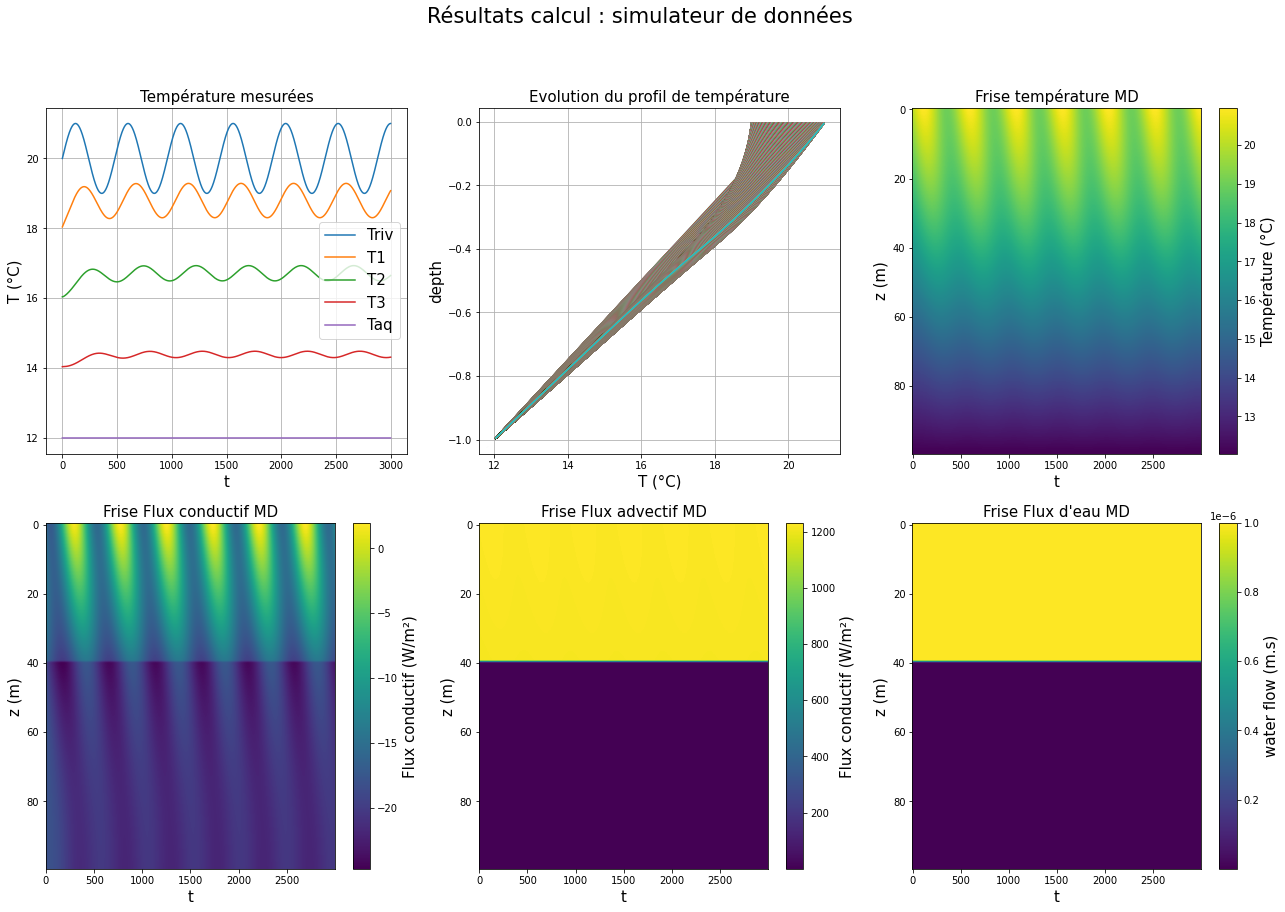

In [10]:
col.plot_CALC_results()

### B. Calculs et prédictions d'obeservation

285.19

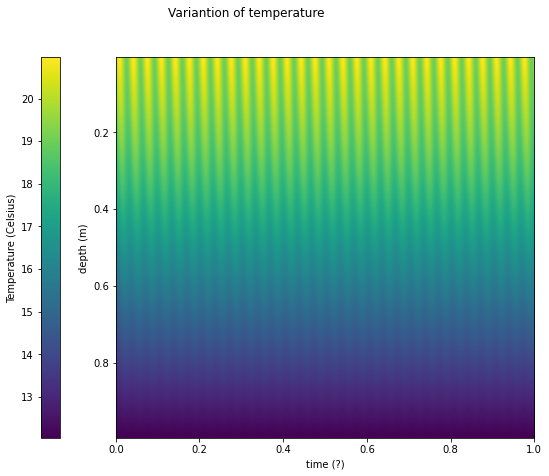

In [11]:
# Diagramme T-z
fig, ax = plt.subplots(figsize=(10, 7), facecolor = 'w')

imm = ax.imshow(
    col.temps_solve - 273.15,
    aspect = "auto",
    extent = [0, 1, col.depths_solve[-1], col.depths_solve[0]], #TODO : trouver comment monter le datetime
)
cbar = fig.colorbar(imm, shrink=1,location='left')
cbar.set_label('Temperature (Celsius)')

fig.suptitle("Variantion of temperature")
ax.set_xlabel("time (?)")
ax.set_ylabel("depth (m)")
np.min(col.temps_solve)

Index 25 in z_array -> 0.255
Index 50 in z_array -> 0.505
Index 75 in z_array -> 0.755


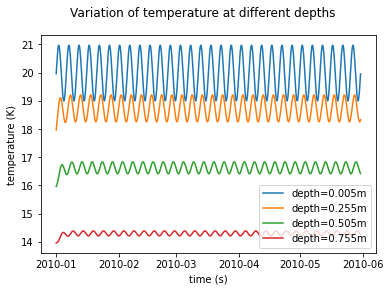

In [12]:
# Diagramme T-t
ind1 = 25
ind2 = 50
ind3 = 75
print(f"Index {ind1} in z_array -> {col.depths_solve[ind1]}")
print(f"Index {ind2} in z_array -> {col.depths_solve[ind2]}")
print(f"Index {ind3} in z_array -> {col.depths_solve[ind3]}")

fig, ax = plt.subplots(facecolor = 'w')
ax.plot(col.times_solve, col.get_temps_solve(col.depths_solve[0])-273.15, label = f"depth={col.depths_solve[0]:.3f}m")
ax.plot(col.times_solve, col.get_temps_solve(col.depths_solve[ind1])-273.15, label = f"depth={col.depths_solve[ind1]:.3f}m")
ax.plot(col.times_solve, col.get_temps_solve(col.depths_solve[ind2])-273.15, label = f"depth={col.depths_solve[ind2]:.3f}m")
ax.plot(col.times_solve, col.get_temps_solve(col.depths_solve[ind3])-273.15, label = f"depth={col.depths_solve[ind3]:.3f}m")
fig.suptitle("Variation of temperature at different depths")
ax.set_xlabel("time (s)")
ax.set_ylabel("temperature (K)")
#ax.set_xlim(0,0.1)
ax.legend()

## 2.Monolayer stationnaire

### A. Cas infiltration conduction ：dH > 0, K petit

#### a. Définition d'expérience

In [13]:
K_offset = 273.15

t_debut = (2010, 1, 1)
t_fin = (2010, 5, 30, 23, 59, 59)
dt = 15*60 # pas de temps en (s)

T_riv_amp = 1
T_riv_offset = 20 + K_offset
P_T_riv = 24*4*dt

T_aq_amp = 0
T_aq_offset = 12 + K_offset
P_T_aq = -9999 # à mettre dans le init

dH_amp = 0
dH_offset = 1
P_dh = -9999 #14*24*4*dt

In [14]:
time_series_dict_user1 = {
    "offset":.0,
    "depth_sensors":[.25, .5, .75, 1],
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": [dH_amp, P_dh, dH_offset], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"param_T_riv_signal": [T_riv_amp, P_T_riv, T_riv_offset],
    "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
    "sigma_meas_P": None,
    "sigma_meas_T": None, #float
}

emu_observ_test_user1 = Time_series.from_dict(time_series_dict_user1)
emu_observ_test_user1._dates

array([None], dtype=object)

In [15]:
from datetime import datetime

times = [datetime.fromtimestamp(1000*k) for k in range(500)]
temps = np.load("data/val_data.npy")

col_dict = {
	"river_bed": 1., 
    "depth_sensors": [.25, .5, .75, 1], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": list(zip(times,list(zip(-.01*np.cos(np.linspace(0,2*np.pi,500))+.03, temps[:,0])))),
	"T_measures": list(zip(times, temps[:,[32,66,-1]])),
    "sigma_meas_P": None, #float
    "sigma_meas_T": None, #float
}

col = Column.from_dict(col_dict)

In [16]:
params = Param(
    moinslog10K = 12,
    n = .1,
    lambda_s = 2,
    rhos_cs = 4e6
)

#### b. Calculs

In [17]:
col.compute_solve_transi(params, 100)

ValueError: x and y arrays must be equal in length along interpolation axis.

## 3. Multilayer : 1 capteur par layer

## 4. Multilayer : 1 layer sans capteur